In [3]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('data/Titanic_Cleaned.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [18]:
df_train = df[df['Survived'].notna()]
df_test = df[df['Survived'].isna()]
df_train.to_csv('data/train.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [19]:
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (891, 15)
Test set shape: (418, 15)


In [20]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [22]:
df_train['TravelAlone'] = ((df_train['SibSp'] + df_train['Parch']) == 0).astype(int)

In [25]:
df_train[['SibSp', 'Parch', 'TravelAlone']].head()

,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [27]:
df_train.drop(columns=['SibSp', 'Parch'], inplace=True)


In [28]:
df_train.head()

,PassengerId,Survived,Pclass,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,False,2,1,True,False,True,False,True,False,False,1


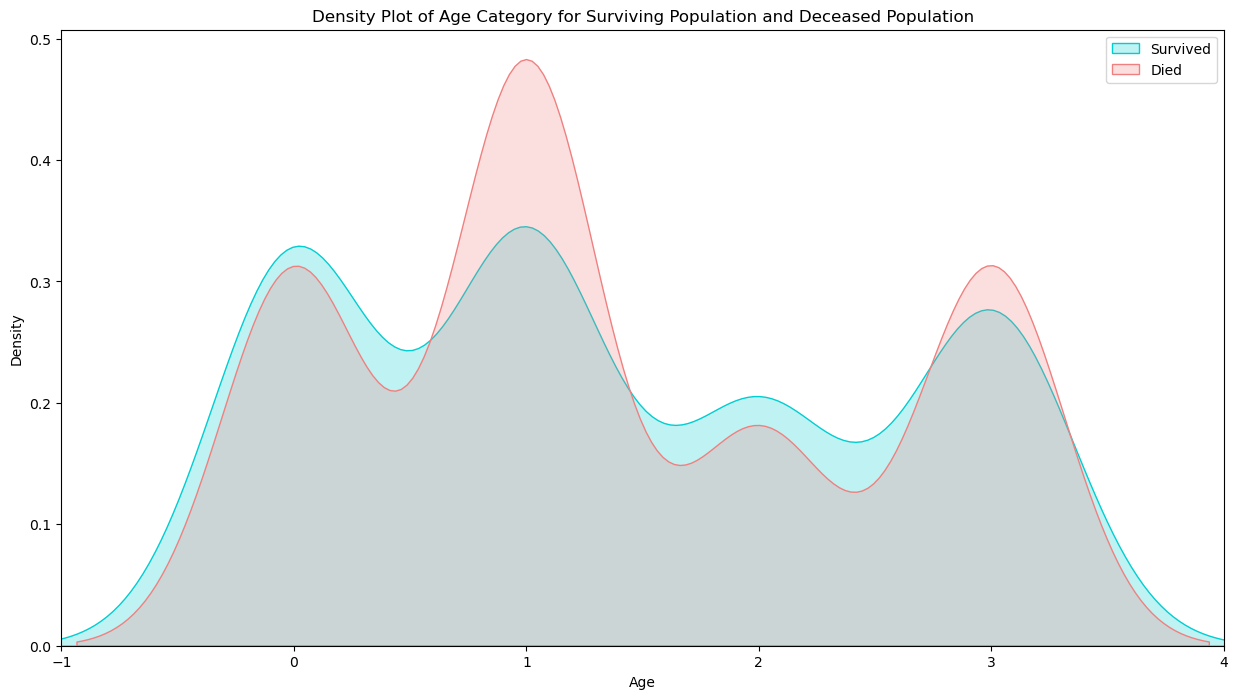

In [34]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()


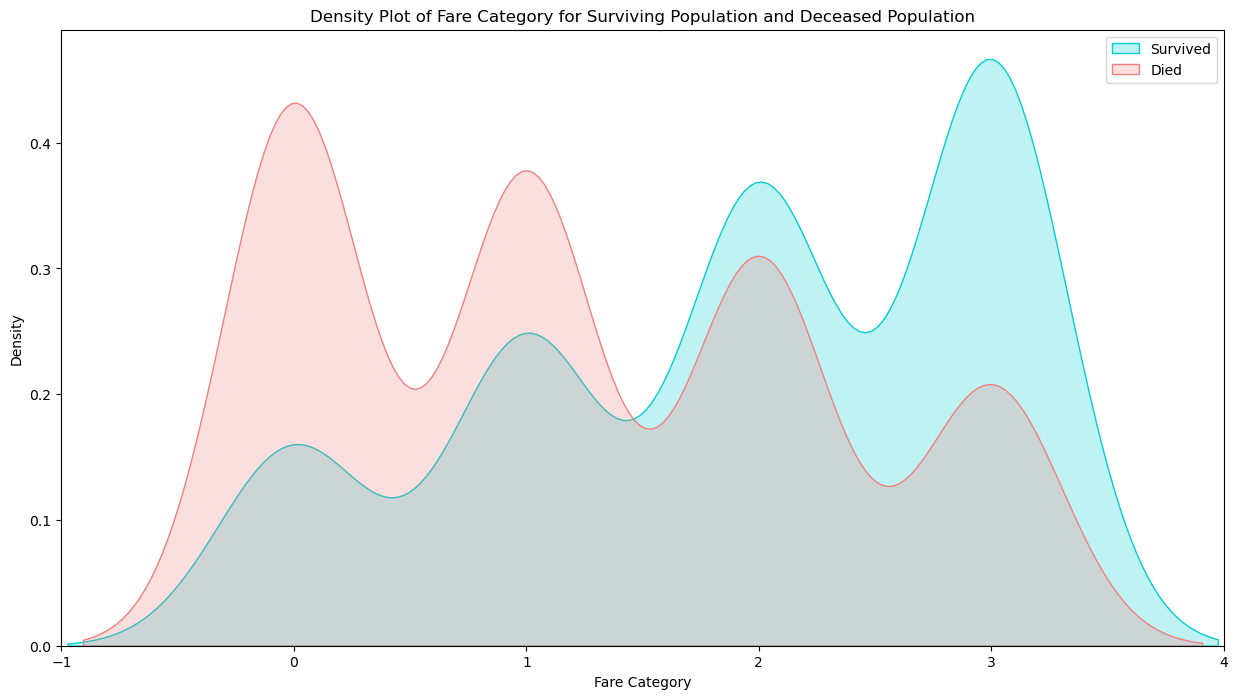

In [41]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='Fare Category')
plt.xlim(-1,4)
plt.show()

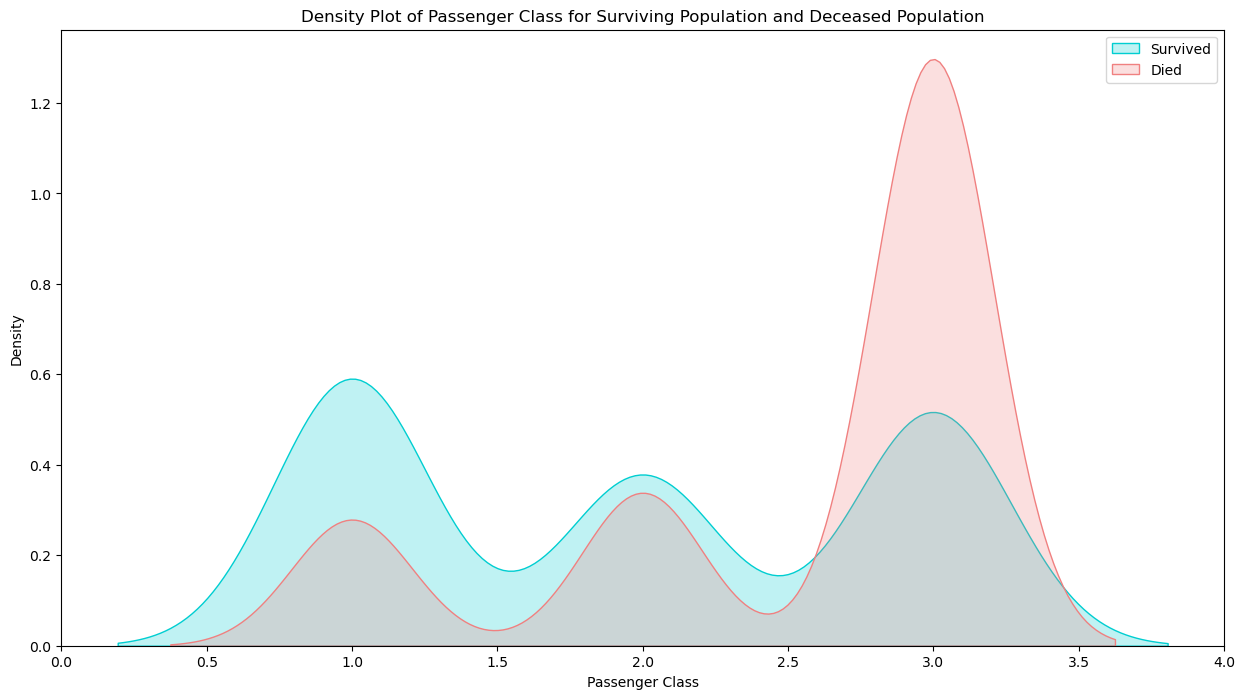

In [40]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Passenger Class for Surviving Population and Deceased Population')
ax.set(xlabel='Passenger Class')
plt.xlim(0,4)
plt.show()

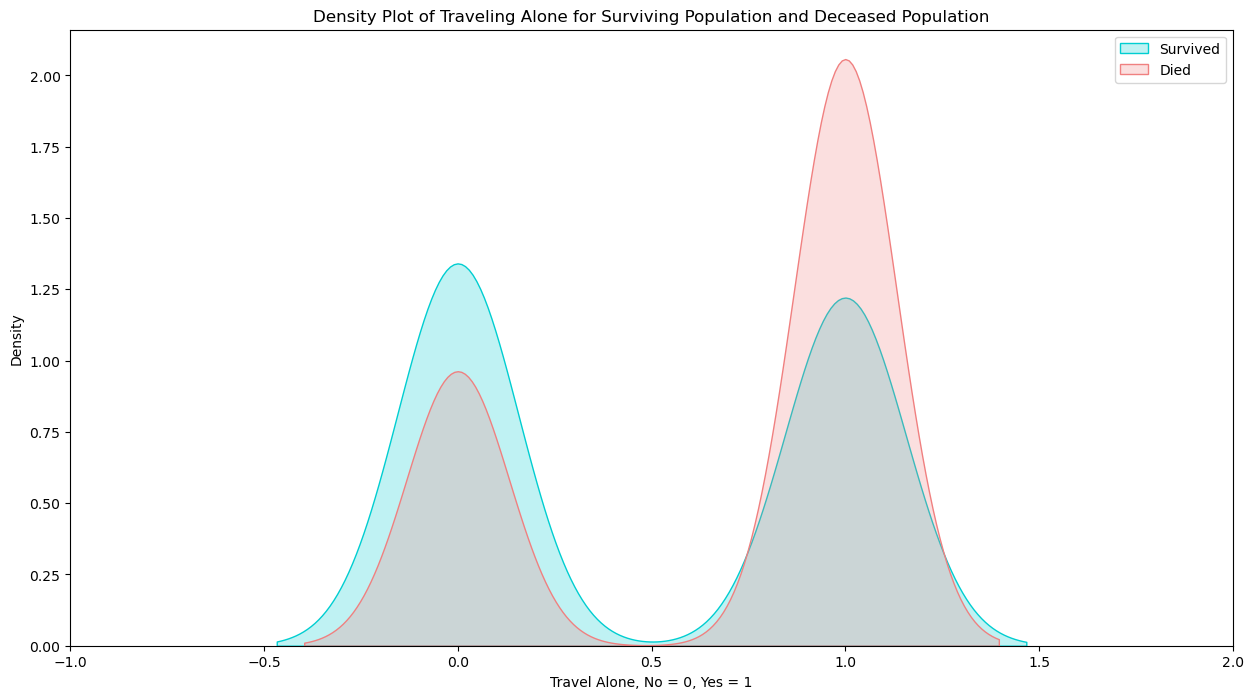

In [47]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Traveling Alone for Surviving Population and Deceased Population')
ax.set(xlabel='Travel Alone, No = 0, Yes = 1')
plt.xlim(-1,2)
plt.show()

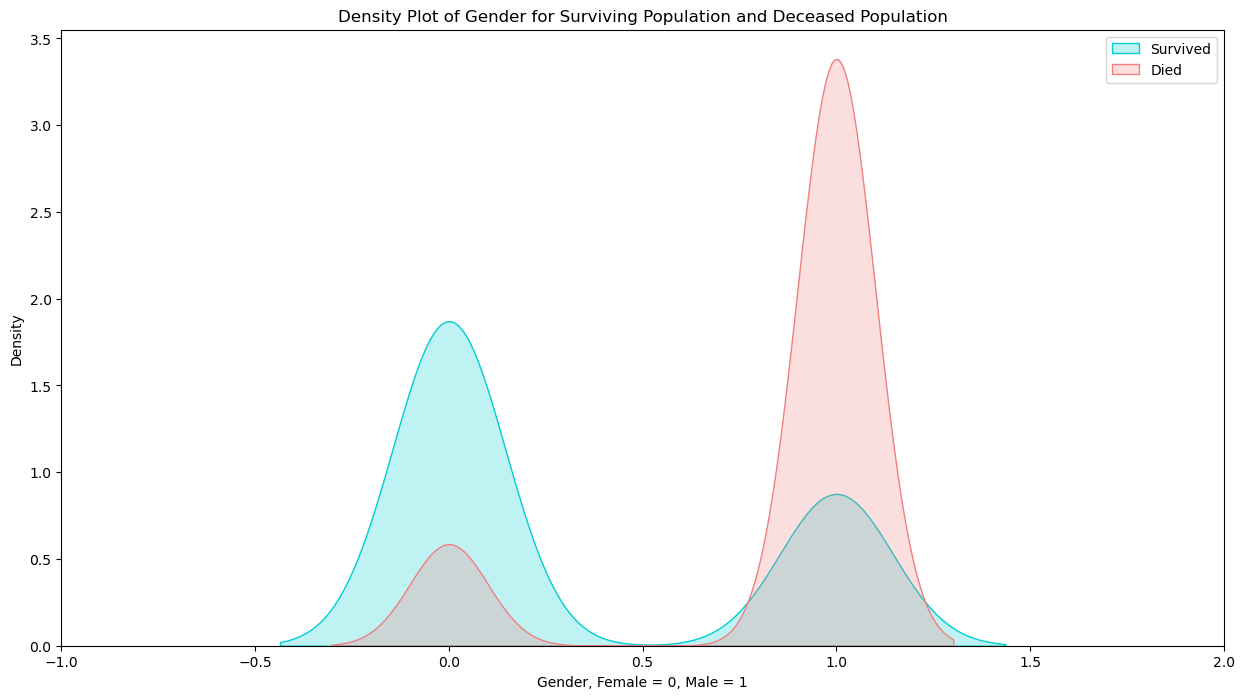

In [48]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0, Male = 1')
plt.xlim(-1,2)
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = train_df.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()